In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('C:\\Users\\zzuge\\trn_micro.csv')
val = pd.read_csv('C:\\Users\\zzuge\\vld_micro.csv')

In [3]:
train

,product_id,is_applied,credit_score,application_n,loyalty,gender,log_yearly_income,log_career,log_desired_amount,log_existing_loan_cnt,...,is_after_16,is_earned_income1,is_earned_income2,is_job_regular,is_job_etc,is_house_own,is_house_lent,is_purpose_living,personal_rehabilitation_yn,personal_rehabilitation_complete_yn
0,265,0,620,18,9,1,6.30103,2.260071,7.544068,0.30103,...,0,1,0,1,0,1,0,0,0,0
1,25,0,620,18,9,1,6.30103,2.260071,7.544068,0.30103,...,0,1,0,1,0,1,0,0,0,0
2,118,0,620,18,9,1,6.30103,2.260071,7.544068,0.30103,...,0,1,0,1,0,1,0,0,0,0
3,150,0,620,18,9,1,6.30103,2.260071,7.544068,0.30103,...,0,1,0,1,0,1,0,0,0,0
4,258,0,620,18,9,1,6.30103,2.260071,7.544068,0.30103,...,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664260,75,1,610,1,3,0,0.00000,0.000000,7.301030,0.60206,...,0,0,0,0,1,0,0,0,0,0
2664261,75,1,610,2,3,0,0.00000,0.000000,7.477121,0.60206,...,0,0,0,0,1,0,0,0,0,0
2664262,206,1,630,3,2,1,7.90309,2.960471,7.301030,0.69897,...,0,0,0,0,1,1,0,0,0,0
2664263,231,0,630,3,2,1,7.90309,2.960471,7.301030,0.69897,...,0,0,0,0,1,1,0,0,0,0


In [4]:
val

,product_id,is_applied,credit_score,application_n,loyalty,gender,log_yearly_income,log_career,log_desired_amount,log_existing_loan_cnt,...,is_after_16,is_earned_income1,is_earned_income2,is_job_regular,is_job_etc,is_house_own,is_house_lent,is_purpose_living,personal_rehabilitation_yn,personal_rehabilitation_complete_yn
0,187,0,620,21,9,1,6.301030,2.260071,7.544068,0.301030,...,0,1,0,1,0,1,0,0,0,0
1,142,1,620,21,9,1,6.301030,2.260071,7.544068,0.301030,...,0,1,0,1,0,1,0,0,0,0
2,56,0,620,21,9,1,6.301030,2.260071,7.544068,0.301030,...,0,1,0,1,0,1,0,0,0,0
3,29,0,620,21,9,1,6.301030,2.260071,7.544068,0.301030,...,0,1,0,1,0,1,0,0,0,0
4,204,0,620,21,9,1,6.301030,2.260071,7.544068,0.301030,...,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667227,148,0,600,14,2,0,7.544068,2.525045,6.778151,0.477121,...,0,0,1,0,1,1,0,1,0,0
667228,257,0,600,14,2,0,7.544068,2.525045,6.778151,0.477121,...,0,0,1,0,1,1,0,1,0,0
667229,31,0,600,14,2,0,7.544068,2.525045,6.778151,0.477121,...,0,0,1,0,1,1,0,1,0,0
667230,39,0,600,14,2,0,7.544068,2.525045,6.778151,0.477121,...,0,0,1,0,1,1,0,1,0,0


In [5]:
x_train=train.drop(['product_id','is_applied'],axis=1)
y_train=train['is_applied']

x_val=val.drop(['product_id','is_applied'],axis=1)
y_val=val['is_applied']

In [6]:
import xgboost as xgb

In [7]:
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dval = xgb.DMatrix(data=x_val, label=y_val)

In [8]:
params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'error',
         'early_stoppings' : 100 }

In [9]:
xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = 400, 
                        early_stopping_rounds = 100, evals=[(dtrain,'train'),(dval,'eval')])

[20:28:18] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.10310	eval-error:0.10267
[1]	train-error:0.10338	eval-error:0.10297
[2]	train-error:0.10281	eval-error:0.10236
[3]	train-error:0.10284	eval-error:0.10241
[4]	train-error:0.10300	eval-error:0.10255
[5]	train-error:0.10268	eval-error:0.10223
[6]	train-error:0.10303	eval-error:0.10260
[7]	train-error:0.10256	eval-error:0.10213
[8]	train-error:0.10283	eval-error:0.10240
[9]	train-error:0.10264	eval-error:0.10222
[10]	train-error:0.10287	eval-error:0.10244
[11]	train-error:0.10276	eval-error:0.10234
[12]	train-error:0.10275	eval-error:0.10233
[13]	train-err

In [10]:
y_pred_probs = xgb_model.predict(dval)

In [11]:
y_pred_probs

array([0.0398192 , 0.12187077, 0.07123014, ..., 0.07713822, 0.10000036,
       0.05509622], dtype=float32)

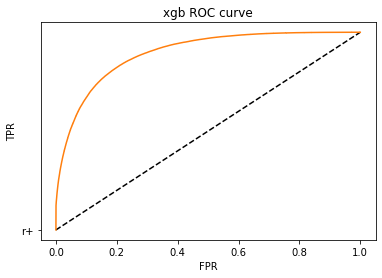

In [12]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred_probs)
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='xgb')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('xgb ROC curve')
plt.show()

In [13]:
roc=pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':thresholds})
optimal_idx=np.argmax(tpr-fpr)
optimal_thresholds=thresholds[optimal_idx]

In [14]:
optimal_thresholds

0.116779216

In [15]:
y_pred = [1 if x>0.3 else 0 for x in y_pred_probs]

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [17]:
f1_score(y_val, y_pred)

0.5597840030298218

In [18]:
precision_score(y_val, y_pred)

0.5567233272177199

In [19]:
recall_score(y_val, y_pred)

0.5628785179907374

In [20]:
accuracy_score(y_val, y_pred)

0.8919925902834397

In [21]:
from sklearn.metrics import roc_auc_score

rand_score = roc_auc_score(y_val, y_pred_probs)
rand_score

0.8947593638006909

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

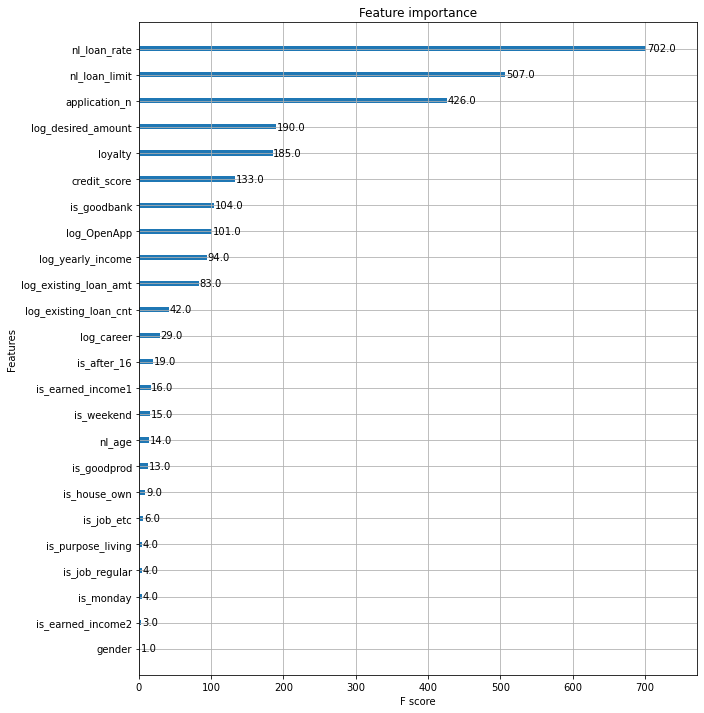

In [57]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)